# Introduction
In this notebook, we solve the Loan Prediction III problem hosted by Analytics Vidhya. 

##  Dataset

### About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Data

Variable : Description

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : Loan approved (Y/N)

Note: 

Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
You are expected to upload the solution in the format of "sample_submission.csv"

## Roadmap
Our workflow is as follows:
1. Data Cleaning and processing
2. Exploratory Data Analysis
3. Feature Engineering and Selection
4. Develop models and compare them on performance metric
5. Perform Hyperparameter tuning on shortlisted model
6. Evaluate the best model on validation set
7. Predict values 
8. Conclusion

## Objective
It is a supervised classification task where our target variable is Loan_Status. In our test data set, given the features, we need to predict whether the loan will be approved or not. It's a binary classification task of Y/N.

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('ticks')
plt.style.use('ggplot')

pd.set_option('display.max_columns',30)

# Data Cleaning and Processing

In [2]:
import os
os.getcwd()

'/Users/kavyaannapareddy/Desktop/Projects/python/wip'

In [3]:
file_path_train = '/Users/kavyaannapareddy/Desktop/Projects/python/wip/loan_prediction_train_file.csv'
file_path_test = '/Users/kavyaannapareddy/Desktop/Projects/python/wip/loan_prediction_test_file.csv'
loan_train= pd.read_csv(file_path_train, header='infer')
loan_test= pd.read_csv(file_path_test, header='infer')


In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
loan_train.shape

(614, 13)

In [7]:
loan_test.shape

(367, 12)

In [8]:
# save test id 
loan_test_id= loan_test['Loan_ID']
loan_train_id = loan_train[['Loan_ID','Loan_Status']]

In [9]:
loan_test_id.shape

(367,)

In [10]:
# combine data 
loan = pd.concat([loan_train.drop('Loan_Status', axis=1),loan_test], axis=0, 
          ignore_index=True)

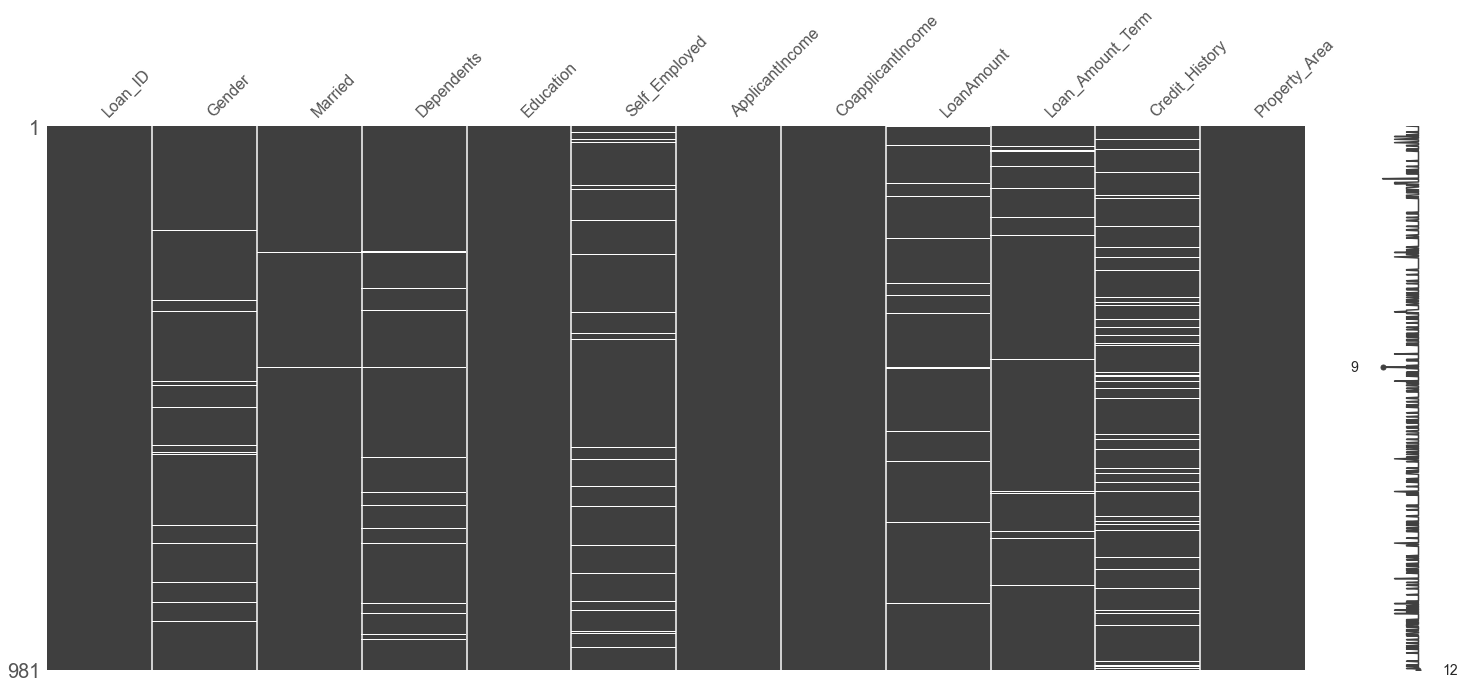

In [11]:
import missingno as mn
mn.matrix(loan)

## Missing Values
Credit History has the most number of missing values. Other columns such as Gender, Married, Dependents, Self-Employed, LoanAmount , Loan_Amount_Term also have missing values.
Let's do some EDA before we deal with missing values

# Exploratory Data 
## Target Variable

In [12]:
loan_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Our target variable is Loan_Status and has either Yes or No as output. The class of target isn't balanced and we need to used Stratified sampling to ensure class balance is maintained. Let's look the relation of features with the target variable.
Let's categorize the features into numerical and categorical for ease of handling. 
## Numerical and Categorical Variables

In [13]:
loan.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [14]:
num_var=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
         'Loan_Amount_Term']
cat_var = ['Gender', 'Married', 'Education','Self_Employed',
           'Credit_History','Property_Area','Dependents']

In [15]:
loan_train['Credit_History'] = loan_train['Credit_History'].replace({0:
                                                            'No',1:'Yes'})

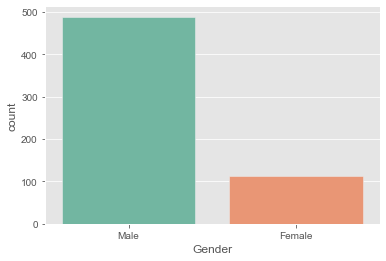

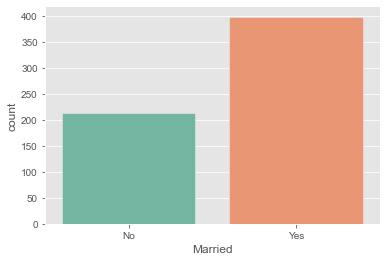

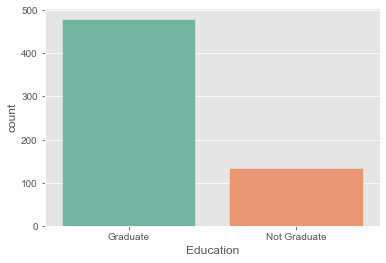

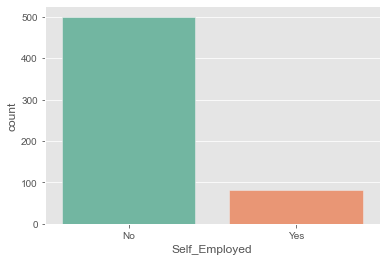

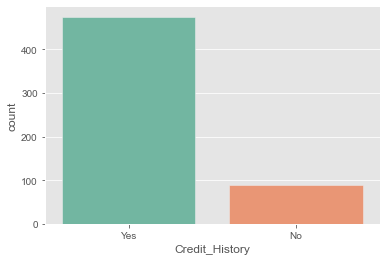

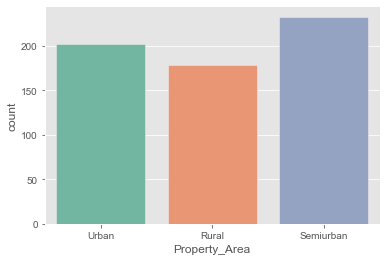

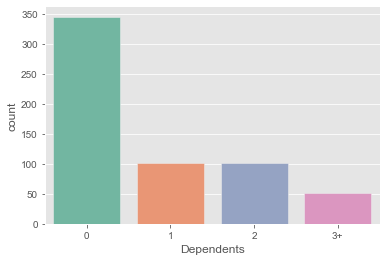

In [16]:
sns.set_palette('Set2')
for feature in cat_var:
    sns.countplot(loan_train[feature])
    plt.show()

We observe that there are more male applicants than female, people who are married , employed at companies , whose credit history meets guidelines and who are graduates. 

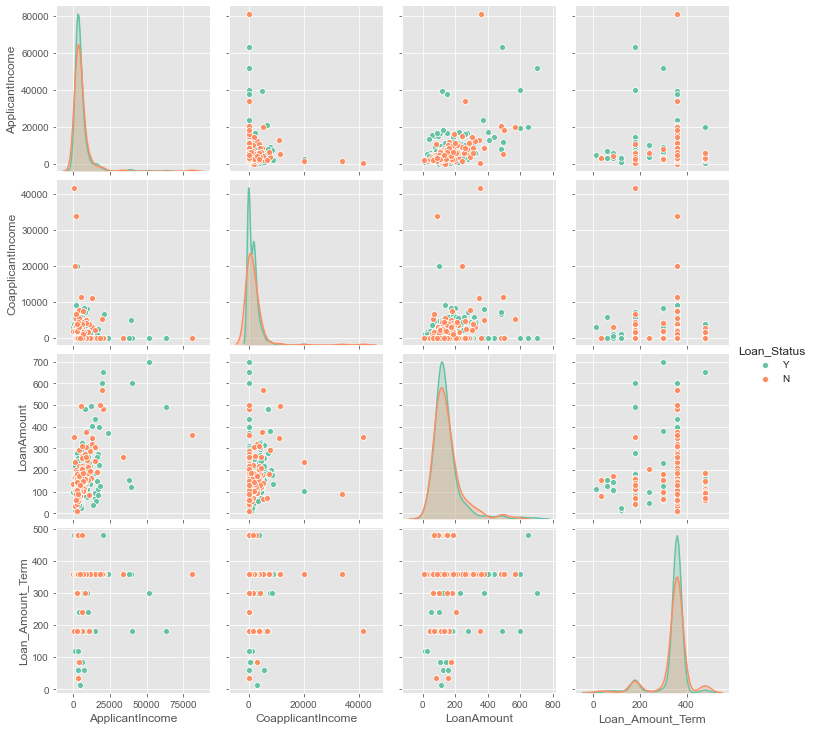

In [17]:
num_var.append('Loan_Status')
sns.pairplot(loan_train[num_var], hue= 'Loan_Status')

The peakedness of features distribution for approved loans is higher than unapproved loans. However, we observe no distinct separation of classes based on numerical features alone in 2D space.  

In [18]:
num_var.remove('Loan_Status')

Gender


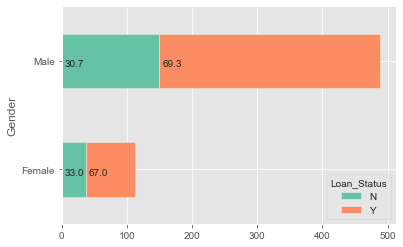

Married


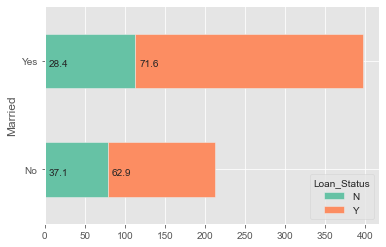

Education


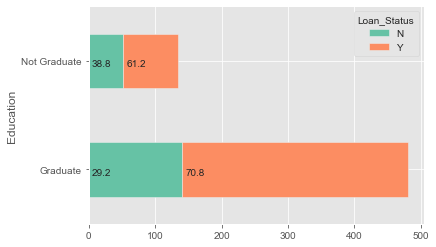

Self_Employed


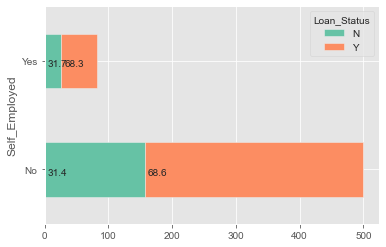

Credit_History


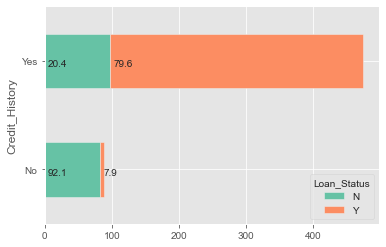

Property_Area


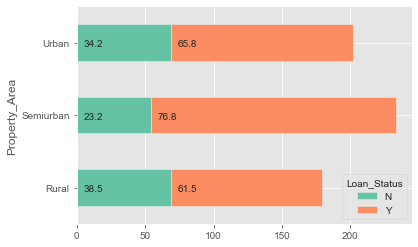

Dependents


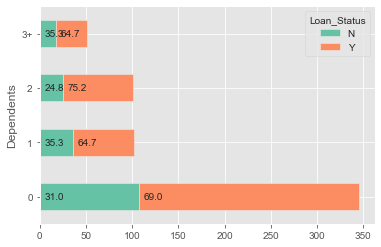

In [19]:
# Plot barchart with percentage values
values=[]
s=0
        
for feature in cat_var:
    ax= pd.crosstab( columns= loan_train['Loan_Status'], index= 
            loan_train[feature]).plot (kind= 'barh', stacked= True)     
    for x in range(2):    
        for i,y in enumerate(loan_train.groupby(feature)[feature].value_counts()):
            values.append(y)
            
    print(feature)
    for p in ax.patches:
        val= p.get_width()/values[s]
        val = (val*100).round(1)
        x_offset =5
        y_offset = 0.2
        ax.annotate(val,((p.get_x()+x_offset), p.get_y()+y_offset))
        s=s+1
    plt.show()       

We observe that Credit_History has the most impact in approval of a loan. If the credit history doesn't meet the guidelines, more than 90% of the times, the loan is rejected. Being a graduate and being married increases chance of loan approval. From our data, we notice that being a Male slightly increases the chance of approval and whether self employed or not doesn't matter. Applicant from semi-urban and urban areas have higher approval rate. While majority of the applicants have zero dependents, applicants with two dependents have slightly more loan approval rate.
These observations, however, shouldn't be considered in isolation, but specific to this dataset. 

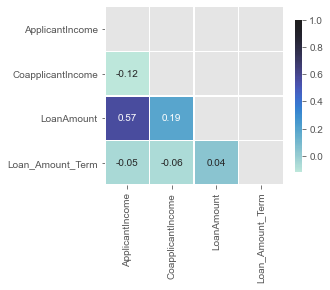

In [20]:
# Heatmap
corr= loan_train[num_var].corr().round(2)
# create a mask for upper triangle
mask= np.triu(np.ones_like(corr, dtype= np.bool))
# set up the matplotlib figure
fig, ax= plt.subplots( figsize= (4,4))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, 
           center= True, annot= True, square= True, linewidth= 0.5, 
           cbar_kws={'shrink':0.7})

# Feature Engineering and Selection
Let's deal with missing values before we one hot encode categorical variables.

## Dealing with Missing Values

In [21]:
# create a duplicate df before making changes
loan_copy = loan.copy()

We will first use SimpleImputer to impute missing values.

In [22]:
# Create a function to calculate Missing values table
def missing_value(df):
  # missing values by column
  missing_val= df.isnull().sum()
  # % of missing values
  missing_val_percent = missing_val * 100/ len(df)
  # creating a table with values and percentage amounts
  missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
  missing_val_table_rename= missing_val_table.rename(columns= {0:'missing values count', 1:'% of missing values'})
  missing_val_table_rename_sort= missing_val_table_rename[missing_val_table_rename.iloc[:,0]!=0].sort_values(by='missing values count', ascending=False).round(1)
  print('Your dataframe has {} columns of which {} contain missing values'.format(df.shape[1], len(missing_val_table_rename_sort)))


  return missing_val_table_rename_sort


missing_value(loan)

Your dataframe has 12 columns of which 7 contain missing values


,missing values count,% of missing values
Credit_History,79,8.1
Self_Employed,55,5.6
LoanAmount,27,2.8
Dependents,25,2.5
Gender,24,2.4
Loan_Amount_Term,20,2.0
Married,3,0.3


In [23]:
num_var

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [24]:
from sklearn.impute import SimpleImputer
imp_mean= SimpleImputer(strategy= 'mean')
imp_mode= SimpleImputer(strategy = 'most_frequent')
loan[num_var]= imp_mean.fit_transform(loan[num_var])
loan[cat_var]= imp_mode.fit_transform(loan[cat_var])

## Feature Engineering
Let's create two new variables.
1. Loan Amount per term. ( Loan Amount/ Loan Amount Term)
2. Total Applicant Income. (Applicant income + Co-applicant Income)

In [25]:
loan['loan_amount_per_term']= loan['LoanAmount']/loan['Loan_Amount_Term']
loan['total_applicant_income'] =loan['ApplicantIncome']+ loan['CoapplicantIncome']

In [26]:
missing_value(loan)

Your dataframe has 14 columns of which 0 contain missing values


,missing values count,% of missing values


In [27]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_amount_per_term,total_applicant_income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,142.51153,360.0,1.0,Urban,0.395865,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.00000,360.0,1.0,Rural,0.355556,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.00000,360.0,1.0,Urban,0.183333,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.00000,360.0,1.0,Urban,0.333333,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.00000,360.0,1.0,Urban,0.391667,6000.0


## One-hot Encoding
We use Label Encoder as dummy variables create lot more columns. 

In [28]:
loan[cat_var]

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Dependents
0,Male,No,Graduate,No,1.0,Urban,0
1,Male,Yes,Graduate,No,1.0,Rural,1
2,Male,Yes,Graduate,Yes,1.0,Urban,0
3,Male,Yes,Not Graduate,No,1.0,Urban,0
4,Male,No,Graduate,No,1.0,Urban,0
...,...,...,...,...,...,...,...
976,Male,Yes,Not Graduate,Yes,1.0,Urban,3+
977,Male,Yes,Graduate,No,1.0,Urban,0
978,Male,No,Graduate,No,1.0,Semiurban,0
979,Male,Yes,Graduate,No,1.0,Rural,0


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan[cat_var]=loan[cat_var].apply(le.fit_transform)

In [30]:
loan


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_amount_per_term,total_applicant_income
0,LP001002,1,0,0,0,0,5849.0,0.0,142.51153,360.0,1,2,0.395865,5849.0
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.00000,360.0,1,0,0.355556,6091.0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.00000,360.0,1,2,0.183333,3000.0
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.00000,360.0,1,2,0.333333,4941.0
4,LP001008,1,0,0,0,0,6000.0,0.0,141.00000,360.0,1,2,0.391667,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,1,1,3,1,1,4009.0,1777.0,113.00000,360.0,1,2,0.313889,5786.0
977,LP002975,1,1,0,0,0,4158.0,709.0,115.00000,360.0,1,2,0.319444,4867.0
978,LP002980,1,0,0,0,0,3250.0,1993.0,126.00000,360.0,1,1,0.350000,5243.0
979,LP002986,1,1,0,0,0,5000.0,2393.0,158.00000,360.0,1,0,0.438889,7393.0


In [31]:
X_train = loan.iloc[:614,1:]
X_test= loan.iloc[614:,1:]

In [32]:
y_train = le.fit_transform(loan_train['Loan_Status'])

## Feature Scaling
Our numerical variables have long tails. We try to make them normal by using Standard Scaler. We compute mean and standard deviation on training set and apply the same transformation on testing set.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

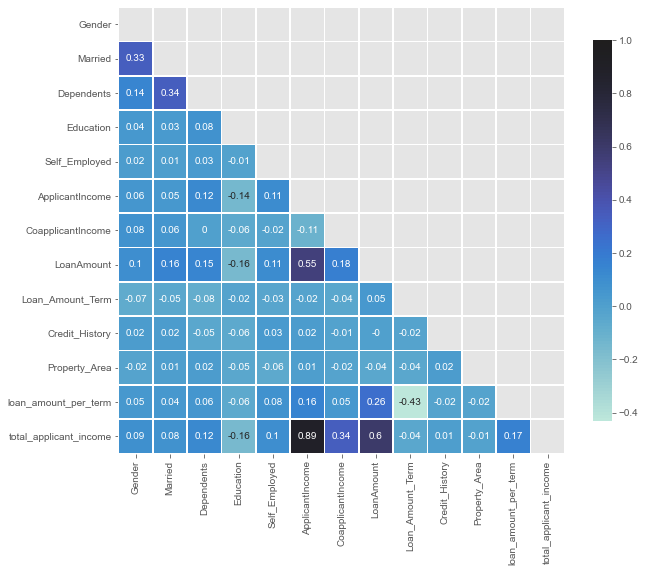

In [34]:
# Heatmap
corr= loan.corr().round(2)
# create a mask for upper triangle
mask= np.triu(np.ones_like(corr, dtype= np.bool))
# set up the matplotlib figure
fig, ax= plt.subplots( figsize= (10,10))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask= mask, 
           center= True, annot= True, square= True, linewidth= 0.5, 
           cbar_kws={'shrink':0.7})

We observe improved correlations amongst features.

# Develop models and compare
We implement the following models and choose the best performing one.
1. Logistic Regression
2. Decision Tree/ Random Forest
3. Support Vector Machine
4. Linear Discriminant Analysis
5. K Nearest Neighbors
6. Naive Bayes


## Set Performance Metric
We set accuracy to be our performance metric on which we judge our models.

In [35]:
from sklearn.metrics import accuracy_score

Let's split our data into train and validation datasets.
## Split dataset

In [36]:
from sklearn.model_selection import train_test_split
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train_scaled, y_train, random_state=42,test_size= 0.2)

In [37]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(solver='liblinear', class_weight='balanced')
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200)
from sklearn.svm import SVC
svc= SVC()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
models= {'Logistic Regression':clf,'Random Forest':rfc,
         'Support Vector Machine': svc, 'Linear Discriminant Analysis':lda,
        'K Nearest Neighbors': knn,'Naive Bayes':gnb }

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
results=[]
for model in models:
    kfold= StratifiedKFold( n_splits=10, random_state=42, shuffle=True)
    score= cross_val_score(models[model], X_train_split, y_train_split, 
                           cv=kfold, scoring='accuracy')
    results.append(score)
    print('%s: %f, (%f)'%(model, np.mean(results), np.std(results)))

Logistic Regression: 0.755592, (0.039810)
Random Forest: 0.774980, (0.039820)
Support Vector Machine: 0.784163, (0.038242)
Linear Discriminant Analysis: 0.790296, (0.038284)
K Nearest Neighbors: 0.788286, (0.041531)
Naive Bayes: 0.789299, (0.039770)


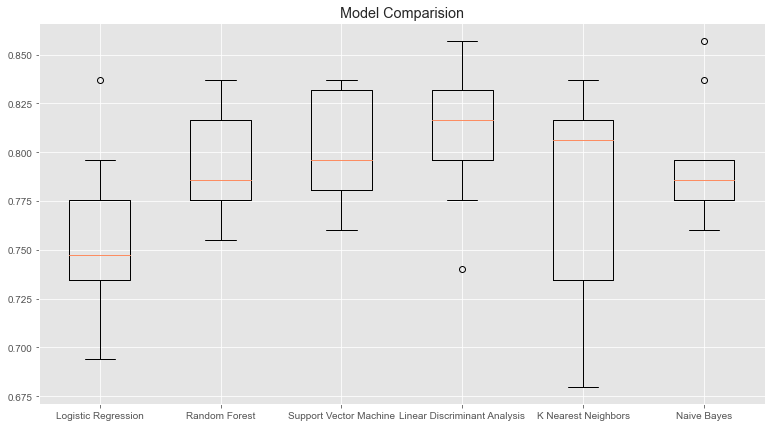

In [39]:
plt.figure(figsize= (13,7))
plt.title('Model Comparision')
plt.boxplot(results, labels= models.keys())
plt.show()

We observe that LDA algorithm perform the best. Since we have limited training dataset, we need to avoid over-fitting of data as well. 

# Hyper parameter Tuning

In [40]:
lda

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [41]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid= {'n_components':[2,3,4],'solver':['svd','lsqr','eigen'],
             'shrinkage':[None, 'auto',0.25,0.5,0.75] }
grid= GridSearchCV(lda, param_grid, cv=5, scoring='roc_auc', refit=True, verbose= 3)

# fitting the model for grid search
grid.fit(X_train_split, y_train_split)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] n_components=2, shrinkage=None, solver=svd ......................
[CV]  n_components=2, shrinkage=None, solver=svd, score=0.811, total=   0.0s
[CV] n_components=2, shrinkage=None, solver=svd ......................
[CV]  n_components=2, shrinkage=None, solver=svd, score=0.709, total=   0.0s
[CV] n_components=2, shrinkage=None, solver=svd ......................
[CV]  n_components=2, shrinkage=None, solver=svd, score=0.728, total=   0.0s
[CV] n_components=2, shrinkage=None, solver=svd ......................
[CV]  n_components=2, shrinkage=None, solver=svd, score=0.704, total=   0.0s
[CV] n_components=2, shrinkage=None, solver=svd ......................
[CV]  n_components=2, shrinkage=None, solver=svd, score=0.738, total=   0.0s
[CV] n_components=2, shrinkage=None, solver=lsqr .....................
[CV]  n_components=2, shrinkage=None, solver=lsqr, score=0.811, total=   0.0s
[CV] n_components=2, shrinkage=None, solver=lsqr 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 componen

[CV]  n_components=2, shrinkage=0.75, solver=svd, score=nan, total=   0.0s
[CV] n_components=2, shrinkage=0.75, solver=svd ......................
[CV]  n_components=2, shrinkage=0.75, solver=svd, score=nan, total=   0.0s
[CV] n_components=2, shrinkage=0.75, solver=svd ......................
[CV]  n_components=2, shrinkage=0.75, solver=svd, score=nan, total=   0.0s
[CV] n_components=2, shrinkage=0.75, solver=svd ......................
[CV]  n_components=2, shrinkage=0.75, solver=svd, score=nan, total=   0.0s
[CV] n_components=2, shrinkage=0.75, solver=lsqr .....................
[CV]  n_components=2, shrinkage=0.75, solver=lsqr, score=0.801, total=   0.0s
[CV] n_components=2, shrinkage=0.75, solver=lsqr .....................
[CV]  n_components=2, shrinkage=0.75, solver=lsqr, score=0.721, total=   0.0s
[CV] n_components=2, shrinkage=0.75, solver=lsqr .....................
[CV]  n_components=2, shrinkage=0.75, solver=lsqr, score=0.695, total=   0.0s
[CV] n_components=2, shrinkage=0.75, sol

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
NotImplementedError: shrinkage not supported

  FitFailedWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components ca

[CV]  n_components=3, shrinkage=0.5, solver=lsqr, score=0.805, total=   0.0s
[CV] n_components=3, shrinkage=0.5, solver=lsqr ......................
[CV]  n_components=3, shrinkage=0.5, solver=lsqr, score=0.718, total=   0.0s
[CV] n_components=3, shrinkage=0.5, solver=lsqr ......................
[CV]  n_components=3, shrinkage=0.5, solver=lsqr, score=0.699, total=   0.0s
[CV] n_components=3, shrinkage=0.5, solver=lsqr ......................
[CV]  n_components=3, shrinkage=0.5, solver=lsqr, score=0.705, total=   0.0s
[CV] n_components=3, shrinkage=0.5, solver=lsqr ......................
[CV]  n_components=3, shrinkage=0.5, solver=lsqr, score=0.718, total=   0.0s
[CV] n_components=3, shrinkage=0.5, solver=eigen .....................
[CV]  n_components=3, shrinkage=0.5, solver=eigen, score=0.805, total=   0.0s
[CV] n_components=3, shrinkage=0.5, solver=eigen .....................
[CV]  n_components=3, shrinkage=0.5, solver=eigen, score=0.718, total=   0.0s
[CV] n_components=3, shrinkage=0.

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components >

[CV]  n_components=4, shrinkage=0.25, solver=eigen, score=0.807, total=   0.0s
[CV] n_components=4, shrinkage=0.25, solver=eigen ....................
[CV]  n_components=4, shrinkage=0.25, solver=eigen, score=0.711, total=   0.0s
[CV] n_components=4, shrinkage=0.25, solver=eigen ....................
[CV]  n_components=4, shrinkage=0.25, solver=eigen, score=0.708, total=   0.0s
[CV] n_components=4, shrinkage=0.25, solver=eigen ....................
[CV]  n_components=4, shrinkage=0.25, solver=eigen, score=0.706, total=   0.0s
[CV] n_components=4, shrinkage=0.25, solver=eigen ....................
[CV]  n_components=4, shrinkage=0.25, solver=eigen, score=0.725, total=   0.0s
[CV] n_components=4, shrinkage=0.5, solver=svd .......................
[CV]  n_components=4, shrinkage=0.5, solver=svd, score=nan, total=   0.0s
[CV] n_components=4, shrinkage=0.5, solver=svd .......................
[CV]  n_components=4, shrinkage=0.5, solver=svd, score=nan, total=   0.0s
[CV] n_components=4, shrinkage=

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components >

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None,
             param_grid={'n_components': [2, 3, 4],
                         'shrinkage': [None, 'auto', 0.25, 0.5, 0.75],
                         'solver': ['svd', 'lsqr', 'eigen']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [42]:
print(grid.best_params_)

{'n_components': 2, 'shrinkage': None, 'solver': 'svd'}


# Validate the model


In [43]:
grid_pred= grid.predict(X_valid_split)

# print classification report
from sklearn.metrics import classification_report
classification_report(grid_pred, y_valid_split)

'              precision    recall  f1-score   support\n\n           0       0.42      0.95      0.58        19\n           1       0.99      0.76      0.86       104\n\n    accuracy                           0.79       123\n   macro avg       0.70      0.85      0.72       123\nweighted avg       0.90      0.79      0.82       123\n'

In [44]:
accuracy_score(grid_pred, y_valid_split)

0.7886178861788617

# Predict Values

In [45]:
lda_best = LinearDiscriminantAnalysis(n_components=2, solver='svd')

In [46]:
lda_best.fit(X_train, y_train)
y_pred= lda_best.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(13, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [55]:
y_pred_df = pd.DataFrame(y_pred).replace({1:'Y',0: 'N'})
y_pred_df= y_pred_df.rename(columns={0:'Loan_Status'})

In [57]:
submit = pd.concat([loan_test_id,y_pred_df], axis=1)


In [58]:
submit.to_csv('sample_submission.csv', index=False)

# Conclusion
We learned to use classification algorithms and predict values for test set for Loan Prediction III problem hosted on Analytics Vidhya. Let's submit and see our score. 

Update:

Your score for this submission is : 0.7847222222222222.